In [1]:
%matplotlib inline

import Angus.my_hashing as my_hashing
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from genome.read_fasta import seq_iter
from Angus.approximation import distfinder, err_distfinder

In [11]:
def freq_freq(size, cutoff, filename, hash_bin):
    frequency_frequency = np.array([], int)

    acc = 0
    i = 0

    while acc < size and i < cutoff:
        number = (hash_bin == i).sum()
        # print(number, acc, i, N)
        frequency_frequency = np.append(frequency_frequency, number)
        acc += i*number
        i += 1
        # print(N, acc, i, number)
    
    np.save('data/' + filename, frequency_frequency)
    
def read_some_data(amount, size, hash_bin, reads, klen):
    acc = 0
    for i in reads:
        acc += 1
        size += 80
        for j in range(80):
            kmer = i[j : j + klen]
            hash_bin[my_hashing.DSA_hash(kmer, 1, 7)] += 1
        if acc >= amount:
            break
    return size, hash_bin

def plot(filename, start, end):
    genome_data = np.load(filename)
    y = range(0, len(genome_data))

    plt.plot(y[start:end], genome_data[start:end])
    plt.show()
    
def plot_together(filename1, filename2, start, end):
    genome_data = np.load(filename1)
    y1 = range(0, len(genome_data))
    
    approx = np.load(filename2)

    plt.plot(y1[start:end], genome_data[start:end], y1[start:end], approx[start:end])
    
    plt.show()
    
def plot_together_many(filename1s, filename2s, output):
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))
    coverages = [[1, 3], [5, 10], [15, 25]]
    for i in range(3):
        for j in range(2):
            axes[i][j].set_title('Coverage level of %sX' % coverages[i][j])
            axes[i][j].set_ylabel('# of k-mers seen x many times')
            axes[i][j].set_xlabel('x')
            genome_data = np.load('data/' + filename1s[2*i + j])
            y1 = range(0, len(genome_data))
            
            if filename2s:
                approx = np.load('data/' + filename2s[2*i + j])
            
                end = min(len(approx), len(genome_data)) - 1
            
                axes[i][j].plot(y1[1:end], genome_data[1:end], label = 'Experimental Curve')
                axes[i][j].plot(y1[1:end], approx[1:end], label = 'Theoretical Curve')
            else:
                axes[i][j].plot(y1[1:len(genome_data) - 1], genome_data[1:len(genome_data) - 1], label = 'Experimental Curve')
            
            axes[i][j].legend()

    plt.savefig(output)
    plt.show()
    
def random_read_some_data(amount, hash_bin, data):
    for _ in range(amount):
        j = np.random.randint(len(data) - 99)
        for k in range(80): 
            kmer = data[j + k : j + k + klen]
            hash_bin[my_hashing.DSA_hash(kmer, 1, 7)] += 1
    return amount*80, hash_bin
    

In [3]:
reads = seq_iter('genome/reads-aunt_01.fa.gz')
klen = 21

In [4]:
Nr, new_py_hash_bin = read_some_data(2*1250, 0, np.zeros(2**28), reads, klen)
freq_freq(Nr, 500, 'genome_ff_1Xbad', new_py_hash_bin)

Nr, new_py_hash_bin = read_some_data(2*3750, 0, np.zeros(2**28), reads, klen)
freq_freq(Nr, 500, 'genome_ff_3Xbad', new_py_hash_bin)

Nr, new_py_hash_bin = read_some_data(2*6500, 0, np.zeros(2**28), reads, klen)
freq_freq(Nr, 500, 'genome_ff_5_2Xbad', new_py_hash_bin)

KeyboardInterrupt: 

In [ ]:
Nr, new_py_hash_bin = read_some_data(2*12500, 0, np.zeros(2**28), seq_iter('genome/reads-aunt_01.fa.gz'), klen)
freq_freq(Nr, 500, 'genome_ff_10Xbad', new_py_hash_bin)

Nr, new_py_hash_bin = read_some_data(2*18750, 0, np.zeros(2**28), seq_iter('genome/reads-aunt_01.fa.gz'), klen)
freq_freq(Nr, 500, 'genome_ff_15Xbad', new_py_hash_bin)

Nr, new_py_hash_bin = read_some_data(2*31250, 0, np.zeros(2**28), seq_iter('genome/reads-aunt_01.fa.gz'), klen)
freq_freq(Nr, 600, 'genome_ff_25Xbad', new_py_hash_bin)

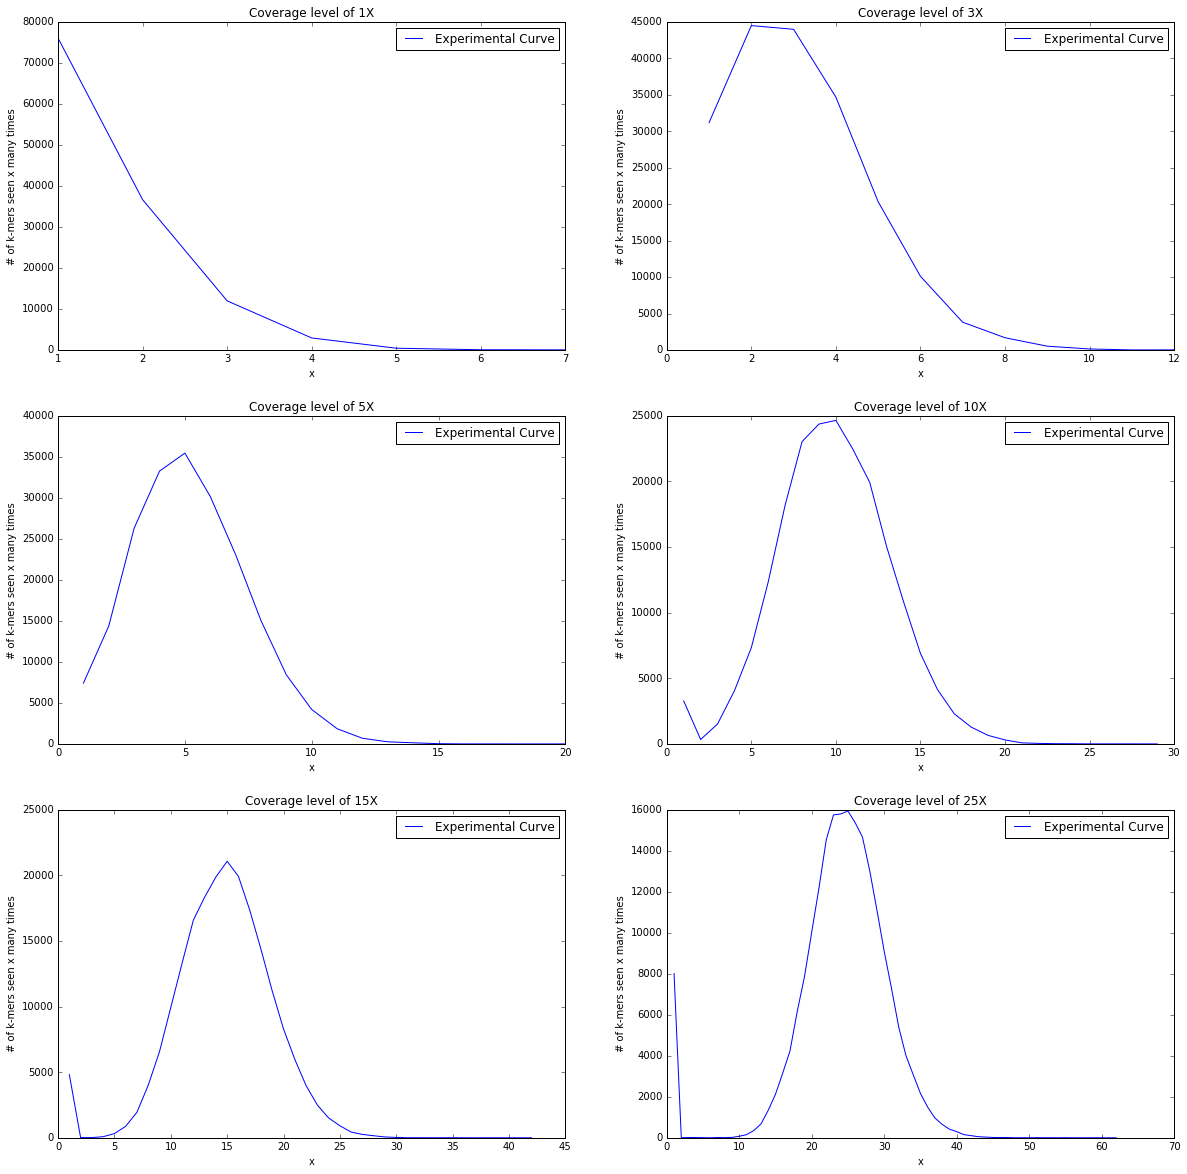

In [12]:
plot_together_many(['genome_ff_1Xbad.npy', 'genome_ff_3Xbad.npy', 'genome_ff_5_2Xbad.npy',
                   'genome_ff_10Xbad.npy', 'genome_ff_15Xbad.npy', 'genome_ff_25Xbad.npy'
                   ], None, 'Angus/freq_freq_curves.png')

In [7]:
err_rate = 63/40000
np.save('data/err_approx_ff_1X', err_distfinder(2*100000, 2*100000, 30, err_rate))
np.save('data/err_approx_ff_3X', err_distfinder(2*100000, 2*300000, 30, err_rate)) 
np.save('data/err_approx_ff_5_2X', err_distfinder(2*100000, 2*520000, 30, err_rate)) 
np.save('data/err_approx_ff_10X', err_distfinder(2*100000, 2*1000000, 30, err_rate)) 
np.save('data/err_approx_ff_15X', err_distfinder(2*100000, 2*1500000, 40, err_rate)) 
np.save('data/err_approx_ff_25X', err_distfinder(2*100000, 2*2500000, 45, err_rate))

In [13]:
plot_together_many(['genome_ff_1Xbad.npy', 'genome_ff_3Xbad.npy', 'genome_ff_5_2Xbad.npy',
                   'genome_ff_10Xbad.npy', 'genome_ff_15Xbad.npy', 'genome_ff_25Xbad.npy'
                   ], ['err_approx_ff_1X.npy', 'err_approx_ff_3X.npy', 'err_approx_ff_5_2X.npy',
                      'err_approx_ff_10X.npy', 'err_approx_ff_15X.npy', 'err_approx_ff_25X.npy'], 'Angus/Theory_vs_Reality.png')